/tmp/ipython-input-3421682741.py:19: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'heart-disease-dataset' dataset.


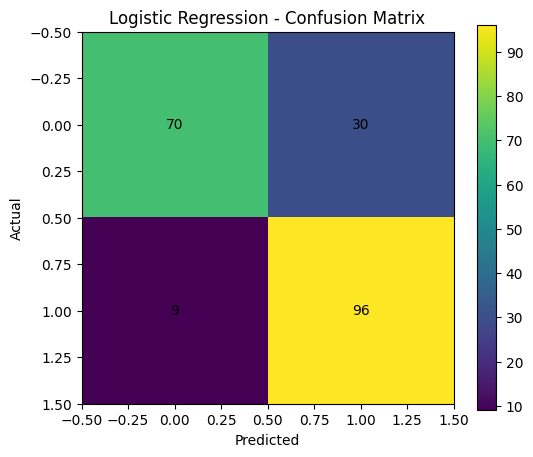

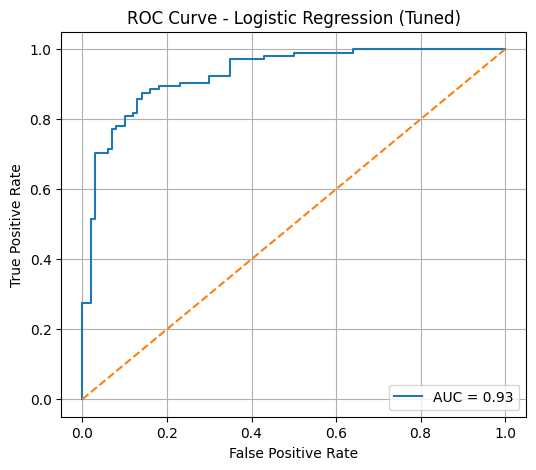

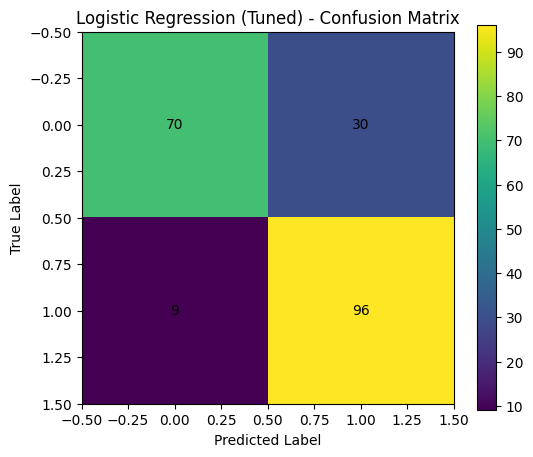

In [5]:
# ==============================
# Experiment 1: Linear & Logistic Regression
# Heart Disease UCI Dataset
# ==============================

import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report, accuracy_score

# -------------------------
# 1. Load Dataset
# -------------------------
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "johnsmith88/heart-disease-dataset",
    "heart.csv"
)

# -------------------------
# 2. Data Preprocessing
# -------------------------
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------
# 3. Model Training & Tuning
# -------------------------
# Untuned Model for the first diagram
log_reg_initial = LogisticRegression(max_iter=1000)
log_reg_initial.fit(X_train_scaled, y_train)
y_pred_initial = log_reg_initial.predict(X_test_scaled)

# Hyperparameter Tuning for the remaining diagrams
param_grid = {"C": [0.01, 0.1, 1, 10], "solver": ["liblinear", "lbfgs"]}
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)
best_model = grid.best_estimator_

y_pred_tuned = best_model.predict(X_test_scaled)
y_prob_tuned = best_model.predict_proba(X_test_scaled)[:, 1]

# -------------------------
# 4. Output: 3 Specific Diagrams
# -------------------------

# Diagram 1: Initial Confusion Matrix
plt.figure(figsize=(6, 5))
cm_init = confusion_matrix(y_test, y_pred_initial)
plt.imshow(cm_init, interpolation='nearest', cmap='viridis')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm_init[i, j], ha="center", va="center", color="black")
plt.show()

# Diagram 2: ROC Curve (Tuned)
plt.figure(figsize=(6, 5))
fpr, tpr, _ = roc_curve(y_test, y_prob_tuned)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"AUC = {round(roc_auc, 3)}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression (Tuned)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Diagram 3: Tuned Confusion Matrix
plt.figure(figsize=(6, 5))
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
plt.imshow(cm_tuned, interpolation='nearest', cmap='viridis')
plt.title("Logistic Regression (Tuned) - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.colorbar()
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm_tuned[i, j], ha="center", va="center", color="black")
plt.show()